<a href="https://colab.research.google.com/github/AbleDanielOfungi/Data-Science-class/blob/main/CottonDiseasePredictionModel(0_9918)Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


locate the file in google drive

In [3]:
path='drive/MyDrive/archive'

In [4]:
# Importing Required Libraries
import cv2
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
#retrieve pathnames/files marching a specified pattern
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
#loko cal i yore mapol
from keras.preprocessing.image import ImageDataGenerator 

from tensorflow.keras.models import Model
%matplotlib inline 
#new comer
#from tensorflow.keras.layers import Dense
#didnt work
#from keras.layers import Activation, Dense
from keras.models import load_model

Procesing and loading the images

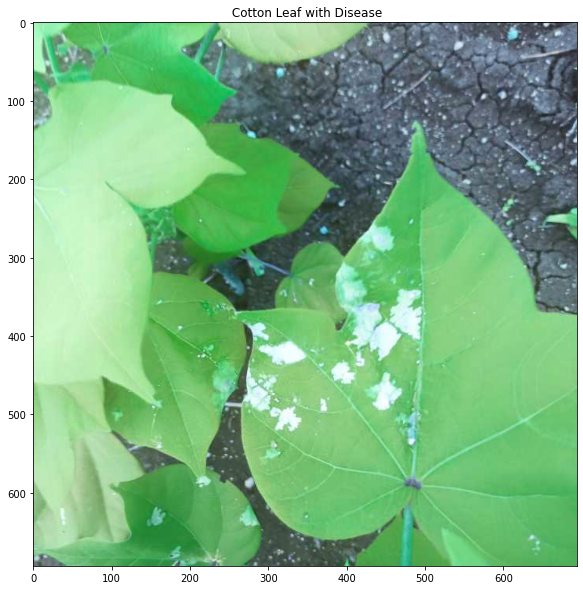

In [5]:
# plotting a directory, very wrong image = cv2.imread('drive/MyDrive/archive/CottonDisease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
image = cv2.imread('drive/MyDrive/archive/CottonDisease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

#cv2.imshow(image)
#plt.imshow(numpy.real(image))
   #plt.show()

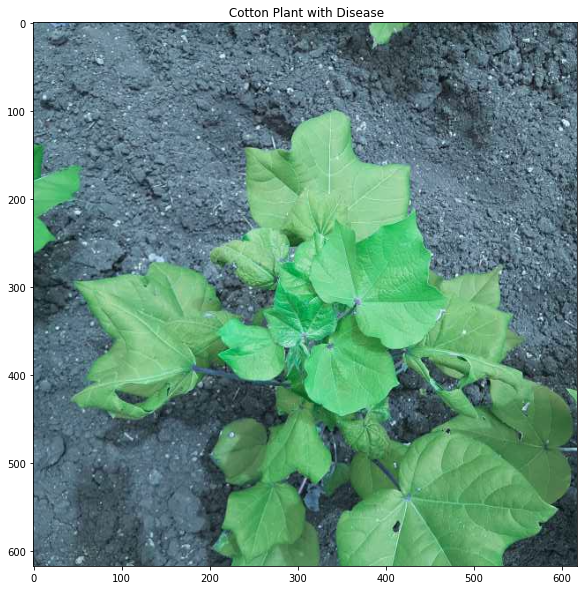

In [6]:
image = cv2.imread('drive/MyDrive/archive/CottonDisease/train/diseased cotton plant/dd (104)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Plant with Disease')
plt.imshow(image)

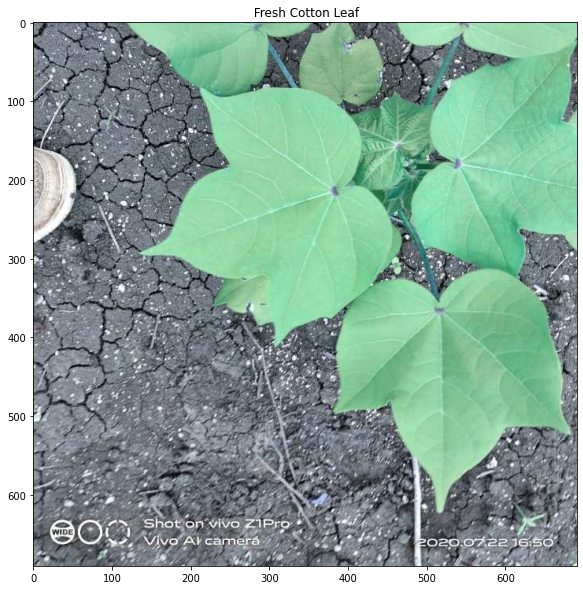

In [7]:
image = cv2.imread('drive/MyDrive/archive//CottonDisease/train/fresh cotton leaf/d (100)_iaip.jpg')
type(image)
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Leaf')
plt.imshow(image)

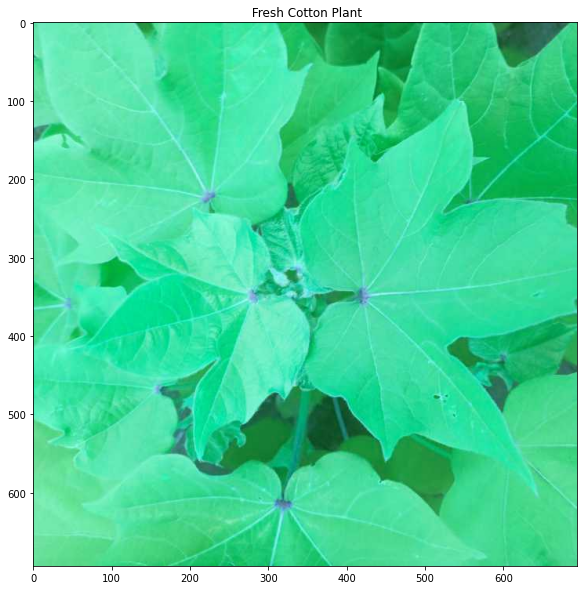

In [8]:
image = cv2.imread('drive/MyDrive/archive/CottonDisease//train/fresh cotton plant/dsd (143)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Plant')
plt.imshow(image)

In [9]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [10]:
train_data = train_datagenerator.flow_from_directory('drive/MyDrive//archive/CottonDisease/train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('drive/MyDrive//archive/CottonDisease//val',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


Able's CNN Model

In [11]:
# CNN Model
cnn = tf.keras.models.Sequential()
# 1st Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# 2nd Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [12]:
# Compiling the CNN 
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
# Training my  CNN on the Training set and evaluating it on the Test set 10 flipping times
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
61/61 [==============================] - 533s 9s/step - loss: 1.3391 - accuracy: 0.4065 - val_loss: 1.2224 - val_accuracy: 0.3123
Epoch 2/10
61/61 [==============================] - 52s 844ms/step - loss: 1.1011 - accuracy: 0.5377 - val_loss: 0.9995 - val_accuracy: 0.5613
Epoch 3/10
61/61 [==============================] - 53s 862ms/step - loss: 0.9699 - accuracy: 0.5864 - val_loss: 0.8016 - val_accuracy: 0.6798
Epoch 4/10
61/61 [==============================] - 51s 837ms/step - loss: 0.8104 - accuracy: 0.6771 - val_loss: 0.6488 - val_accuracy: 0.7194
Epoch 5/10
61/61 [==============================] - 50s 825ms/step - loss: 0.7473 - accuracy: 0.6955 - val_loss: 0.4356 - val_accuracy: 0.8142
Epoch 6/10
61/61 [==============================] - 50s 825ms/step - loss: 0.6228 - accuracy: 0.7463 - val_loss: 0.4680 - val_accuracy: 0.8103
Epoch 7/10
61/61 [==============================] - 50s 824ms/step - loss: 0.6137 - accuracy: 0.7535 - val_loss: 0.4897 - val_accuracy: 0.8379
E

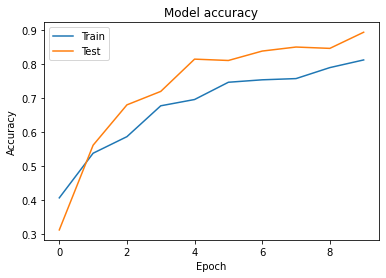

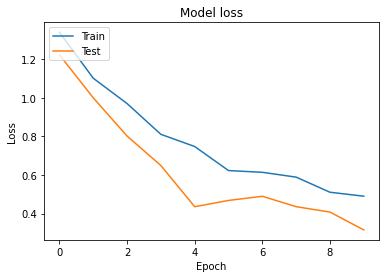

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
from keras.applications.vgg16 import VGG16

In [19]:
#I am using image_size [224, 224] to scale all the images to this size only. And the reason behind this size is that when VGG-16 was trained, Its used image size was [224,224].

#I am storing the VGG-16 model into a vgg variable with the imagenet weight. We want to cut the last layers of VGG-16 because the VGG-16 model was used to categorize thousand of images but in our problem statement, we are having only four categories.
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#input shape is +3 becausethe image has 3 channels RGB
#If you will notice one thing, you will find that I am using include_top=False because I don’t want to add the last layer. If you will use it as true It means that you are adding the last layers.
#i don't wanna use the first and the last layer

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
for layer in vgg16.layers:
    layer.trainable = False

In [21]:
folders = glob('drive/MyDrive//archive/CottonDisease/train/*')

In [22]:
 x = Flatten()(vgg16.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])


In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
#train and validating sets are labeled, test is unlabeled
training_set = train_datagen.flow_from_directory('drive/MyDrive//archive/CottonDisease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1951 images belonging to 4 classes.


In [28]:


test_set = test_datagen.flow_from_directory('drive/MyDrive//archive/CottonDisease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 106 images belonging to 4 classes.


In [29]:
# Fitting the model
#validating to refute overfitting
#overfitting is when the model is very good at classifying but n0t able to classify data it wasn't trained on
#tne concept is general in deep learning more the dense layers more the accuracy and more the training data, best your model will be trained.
#CNN uses extra layers on the top of ANN as convolutional layers, pooling layers, and then all go together in fully connected layers, and then finally you can get your desired output from the output layers.
#So the overall solution for the above problem is to walk through the approach of transfer learning because transfer learning can train a deep neural network with comparatively little data.
#So now, you must have an idea, what is transfer learning. Even in transfer learning, there are many approaches and for that, you can use various pre-trained models such as VGG-16, ResNet-50, etc.
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
61/61 [==============================] - 83s 1s/step - loss: 0.6478 - accuracy: 0.7611 - val_loss: 0.3350 - val_accuracy: 0.8491
Epoch 2/20
61/61 [==============================] - 41s 678ms/step - loss: 0.2624 - accuracy: 0.9036 - val_loss: 0.1964 - val_accuracy: 0.9340
Epoch 3/20
61/61 [==============================] - 41s 670ms/step - loss: 0.1849 - accuracy: 0.9380 - val_loss: 0.1762 - val_accuracy: 0.9245
Epoch 4/20
61/61 [==============================] - 41s 674ms/step - loss: 0.1793 - accuracy: 0.9339 - val_loss: 0.1144 - val_accuracy: 0.9528
Epoch 5/20
61/61 [==============================] - 41s 672ms/step - loss: 0.1151 - accuracy: 0.9610 - val_loss: 0.1034 - val_accuracy: 0.9434
Epoch 6/20
61/61 [==============================] - 41s 670ms/step - loss: 0.0999 - accuracy: 0.9672 - val_loss: 0.0980 - val_accuracy: 0.9811
Epoch 7/20
61/61 [==============================] - 42s 696ms/step - loss: 0.0756 - accuracy: 0.9785 - val_loss: 0.1355 - val_accuracy: 0.9340
Ep

In [30]:
model.save('/content/drive/MyDrive/archive/CottonDisease/daniel.h5') 

In [37]:

model=tf.keras.models.load_model("/content/drive/MyDrive/archive/CottonDisease/daniel.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppynzutrh/assets


INFO:tensorflow:Assets written to: /tmp/tmppynzutrh/assets


59268112

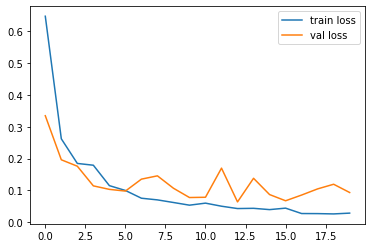

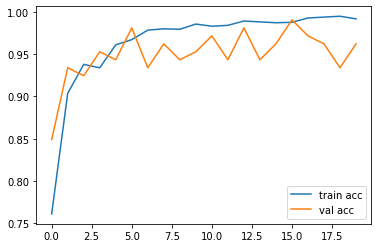

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

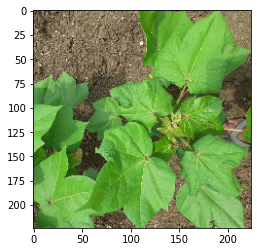

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/archive/CottonDisease/test/diseased cotton plant/dd (16)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)


In [39]:
preds

array([[3.5520311e-04, 9.9785334e-01, 2.5606665e-05, 1.7657962e-03]],
      dtype=float32)

In [40]:


preds = np.argmax(preds, axis=1)


In [41]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
